Let's explore the Gaussian Naive Bayes model in Python. First, import the required Python packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Here we are generating the blobs of points with a Gaussian distribution by using the make_blobs() function as follows:

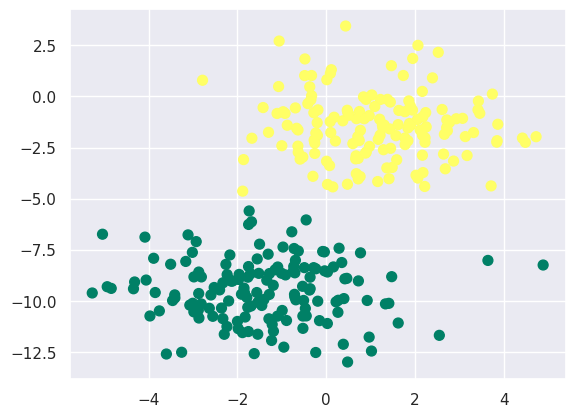

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(300, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer');

Let's import the GaussianNB model and make the object as follows: 

In [4]:
from sklearn.naive_bayes import GaussianNB
model_GNB = GaussianNB()
model_GNB.fit(X, y);

Now, generate some new data for prediction purposes. 

In [5]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model_GNB.predict(Xnew)

To find the boundary, we are plotting the new data.

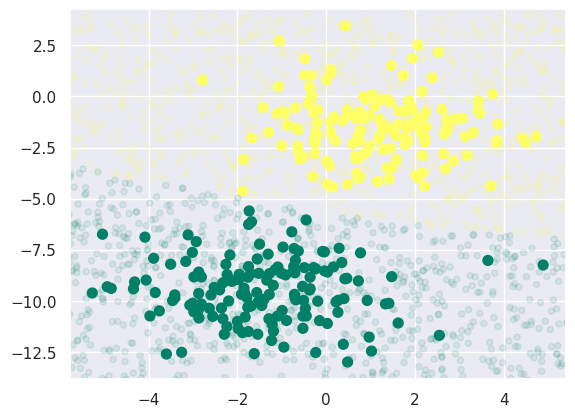

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='summer', alpha=0.1)
plt.axis(lim);

Finally, we are finding the posterior probabilities of first and second labels.

In [7]:
yprob = model_GNB.predict_proba(Xnew)
yprob[-10:].round(3)

array([[0.998, 0.002],
       [1.   , 0.   ],
       [0.987, 0.013],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.986, 0.014]])

There are two bowls, a white bowl, and a blue bowl. In the white bowl, there are four basketballs and a football. In the blue bowl, there are three footballs but no basketballs. While picking up a football, what is the probability that you are picking it up from the blue bowl?

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
blue_bowl_prob = 0.5 
white_bowl_prob = 0.5 
football_blue = 3 
basket_blue = 0
football_white = 1
basket_white = 4
tot_blue = football_blue+basket_blue
tot_white = football_white+basket_white
p_blue = [football_blue/tot_blue,basket_blue/tot_blue]
p_white = [football_white/tot_white,basket_white/tot_white]
N_array = np.array([10,50,70,100,1000,10**4,10**5,2.5*10**5,5*10**5,7.5*10**5,10**6]).astype(int)
picked_bowl = ['Blue','White']
picked_ball = ['Football','Basketball']
est_prob_array = []
for n in N_array:
    N_events = n
    final_state = []
    for i in range(N_events):
        p_bowl = np.random.choice(picked_bowl,p=[blue_bowl_prob,white_bowl_prob])
        if p_bowl == 'Blue':
            p_ball = np.random.choice(picked_ball,p = p_blue)
        if p_bowl == 'White':
            p_ball = np.random.choice(picked_ball,p = p_white)
        final_state.append(p_bowl+' '+p_ball)
    final_data = pd.DataFrame(final_state).value_counts()
    est_prob = final_data['Blue Football']/(final_data['Blue Football']+final_data['White Football'])
    est_prob_array.append(est_prob)
    

In [9]:
print(est_prob)

0.8332728048138498


Let's apply the Naive Bayes classifier to a dataset. At first, we are importing the necessary Python packages. 

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let's download the iris dataset from its weblink as follows:

In [12]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

Now, assign the column names to the dataset as follows:

In [13]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

Next, we have to read the dataset using the Pandas data frame as follows:

In [14]:
data = pd.read_csv(path, names=headernames)
data.shape

(150, 5)

Now, observe the data. 

In [15]:
data.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Let's implement the very basic step of data preprocessing. 

In [16]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values

Here, we are dividing the data into train and test splits, with 70% of the training data and 30% of the testing data.

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Let's do the data scaling. 

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Now, we are training the model with the help of the GaussianNB class of sklearn as follows:

In [20]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train);

Now, we have to make the prediction, which can be done in the following way:

In [21]:
y_pred = classifier.predict(X_test)

Let's print the results as follows:

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

Accuracy: 0.9555555555555556


Using the Naive Bayes classifier, we have achieved an accuracy of 95.56% (approximately).